In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [7]:
import pandas as pd
import keras

df = pd.read_csv("EEG data - Sheet1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 322 entries, Unnamed: 0 to target
dtypes: float64(320), int64(2)
memory usage: 100.8 KB


# Binary classification using SVM a supervised learning
our data has much more features than samples `RangeIndex: 40 entries, 0 to 39 Columns: 322 entries`
`If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.`
## Two main ideas of SVM
svm is more like an optimization for linear classification. It amis to maximize the margin betweent to classes and choose the best decision hyperplane in it to genelize the model.
- Find the maximal margin. Draw tree lines: one to capture data points of one class, one to capture data points of another class, last one to measure their distance. The two first lines are also the border of each class. These vectors are called support vectors. These two borders are called positive hyperplan and negative hipyerplam. How the border is defined? Visualy, it's kind evident, but why we know it's a border?? two kinds of margin: hard and soft
- Sometimes, data points are not separable in the current dimension, or we have some outliers. Then we can transform our data in higher dimension to find the separable border, lower demensionality will not create new feature for distinction. But this transformation can be expensive, so we have different ways get vectors higher dimension information without transforming them, which are also called kernels tricks. For example: `polynominal kernel`, `radial basis function rbf`, `sigmoid kernel`.

## Find threshold
### Dimensionality of threshold
Basically, they are linear algebra: w1x1 + w2x2 + ... + wmxm + b. And intuitively, to separate a n dimensional space, separator's dimension is n - 1. If you want to separate a line, you will use point(even intuitively we might think a point is in one dimension, but in mathematical jargon, a point is a flat affine 0 dimensional subspace), if you want to separate a box into 2 parts, you will use a ruler called a 2-Dimensional plane. You can't use a box to do this separation, because they include each other. And by thinking like this, it helps us to visualize a high dimensional space, by imaging in a 4 dimension splace, our hyperplan is a 3D box called a 3-Dimensional **hyperplane**... But technical speaking, all flat affine subspace are called hyperplane.
### Find maximal margin 
find maximal margin does not mean to find the decision hyperplan but find the support vectors that maximize the margin. This is called **maximal margin classifier**. The distance between the SV and the decision hyperplan is called **hard margin**.
How to calculate the hard margin?
#### interpret the maximal margin
Maximal margin has some conditions. Firstly, the margin is calculated based on our hyperplane. Data points are inchangable, what we can modify is the hyperplane. Different hyperplanes have different margins. Secondly, the hyperplane we choose should be able to separate different vectors.
Based on our hyperplane, we can calculate a set of vectors to its distance and those vectors which have the minimal distance are the support vectors.
The maximal margin is calculated by measuring the distance from a set of vectors to our hyperplane, and our hyperplane should not be closed to only one groupe of vectors, it should locate in the middle of the data groupe to get the sum of maximal distance. `Argmax(D(A,f)+ D(B,f))`

But, when there are outliers in our dataset, the support vectors can be very closed beacause of the outlier, so our model may make more mistakes. To avoid that, we need to make our **threshold** accept misclassification. This is called **bias/Variance tradeoff** that exists in all machine learning tasks. Once we allow misclassification, the distance between the SV and the threshold(decision hyperplam) is called **soft margin**. We are using a soft margin classifier or a **support vector classifier**.
How to calculate a soft margin? We need to calculate the margin and the decision hyperplane for classification job.
Then the task is to show our soft margin is the best one. One way is the **cross valitation**. We count each side of our threshold, how many misclassifications and how many right ones.

SVM is for binominal classification

Text(0.5, 1.0, 'Bad decision hyperplan')

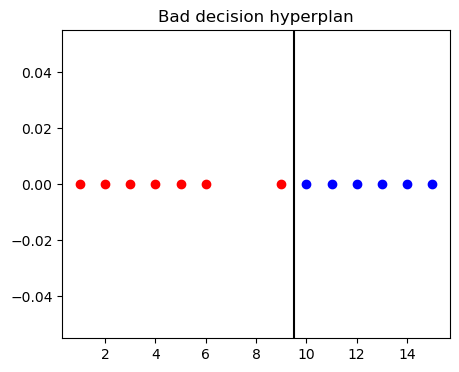

In [78]:
import matplotlib.pyplot as plt
# suppose 1-6 are illed and 10-15 are not illed, but we got a 9 which is illed
illed = [i for i in range(1,7)]
illed.append(9)
nilled = [i for i in range(10,16)]
plt.figure(figsize=(5,4))
plt.plot(illed,[0]*len(illed),'ro')
plt.plot(nilled,[0]*len(nilled),'bo')
plt.axvline(9.5,color='black')
plt.title("Bad decision hyperplan")

### Overlapping data
Once there are overlapping data increase hugely the missclassification, our SVC does not work well anymore, it's time to introduce the SVM

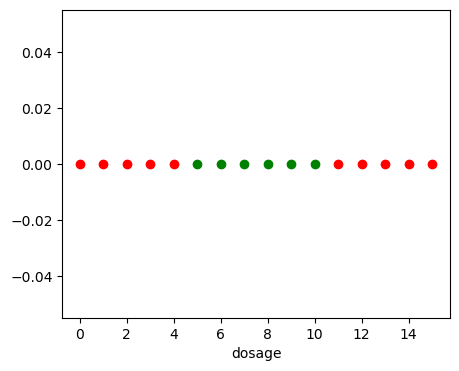

In [76]:
cured = [i for i in range(5,11)]
not_cured = list(set(range(16)) - set(cured))
plt.figure(figsize=(5,4))
plt.plot(cured,[0]*len(cured),'go')
plt.plot(not_cured,[0]*len(not_cured),'ro')
plt.xlabel("dosage")
plt.show()

### Higher dimensionality
How to decide the way to higher dimensionality, why we use  dosage squared but not other ways like cubed? There are ways to transform data into higher dimension in order to make mathematics possible: **kernel functions** to systematically find support vectors classifiers. Like radial kernel or radial basis function kernel and polynominal kernel
Kernel functions calculate data as they were in higher dimensionality without transforming them. It's a fancy trick!
How to know if a training dataset is overlap?
### Polynominal kernel
calculate the relationship between pairs of observations: `(a*b + r)**d`. Where a and b are our observations, r determines the coefficient of the polynominal and d is the degree of polynominal. r and d are determined using cross validation. Since r and d are given, and what make difference is the a and b. And with higher relationship score, the pair of data are more similar, which means more closer in the space.
calculate scores, find support vectors then compute decision hyperplane

Text(0, 0.5, 'square dosage')

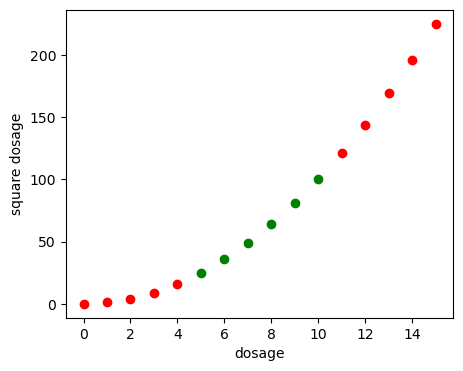

In [77]:
# SVM 
import numpy as np
cured = np.array([
    [i for i in range(5,11)],
    [i**2 for i in range(5,11)]
])

not_cured = np.array([
    list(set(range(16)) - set(range(5,11))),
    [x**2 for x in set(range(16)) - set(range(5,11))]
])
plt.figure(figsize=(5,4))
plt.plot(cured[0],cured[1],'go')
plt.plot(not_cured[0],not_cured[1],'ro')
plt.xlabel("dosage")
plt.ylabel("square dosage")

In [1]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
clf.predict([[2., 2.]])

array([1])

## A demo

In [73]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
class DataGet:
    def __init__(self,path:Path):
        self.path = path
        self.scalar = StandardScaler()
    
    def LoadData(self):
        self.data = pd.read_csv(self.path, header=None)
        return self.data
    
    def SplitData(self):
        data = self.LoadData()
        data_y = data.iloc[1:,-1] # from the 2nd row, because the first row is header
        data_x = data.iloc[1:,1:-1]
        # 320 signals from alpha to gamma that do not have the same weight on the impact of the label
        X_train,X_test,Y_train,Y_test = train_test_split(data_x,data_y,test_size=0.15)
        X_train_scaled = self.scalar.fit_transform(X_train)
        X_test_scaled = self.scalar.fit_transform(X_test)
        X_train = (np.array(X_train))
        X_test = (np.array(X_test))
        Y_train = (np.array(Y_train))
        Y_test = (np.array(Y_test))
        return X_train,X_test,Y_train.astype(int),Y_test.astype(int)
    
def main():
    InputPath = "EEGData.csv"
    DataObj = DataGet(Path(InputPath))
    X_train, X_test, y_train, y_test = DataObj.SplitData()


    
    clf = LinearSVC(random_state=0,tol=1e-5)
    clf1 = SVC(kernel='sigmoid',gamma='auto')
    clf.fit(X_train,y_train)
    clf1.fit(X_train,y_train)
    preds = clf.predict(X_test)
    preds1 = clf1.predict(X_test)
    # precision calculation
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for idx in range(len(preds1)):
        if preds1[idx] == 1 and y_test[idx] ==1:
            TP +=1
        elif preds1[idx] == 1 and y_test[idx] ==0:
            FP +=1
        elif preds1[idx] == 0 and y_test[idx] ==0:
            TN +=1
        elif preds1[idx] == 0 and y_test[idx] == 1:
            FN +=1
    precision = TP / (TP + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    scores = clf.score(X_test,y_test)
    scores1 = clf1.score(X_test,y_test)
    print(precision,accuracy,preds,preds1,y_test,sep="\n")

if __name__ == "__main__":
    main()





0.5
0.5
[1 0 0 0 0 0]
[1 1 1 1 1 1]
[0 0 1 1 1 0]


/home/chen/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# An example of how numpy convert a dataframe, basically is matrix 2 matrix, like the gaussian elimination
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})
# behaves like a matrix: [1 4 7],[2,5,8],[3,6,9]

array = np.array(df)
print(df,array,sep="\n")
def pandas2array(data:dict) -> list[list]:
    array = []
    all_columns = range(len(list(data.columns)))
    for idx in range(len(data)): # iterates all rows
        array.append([data.iloc[idx,key] for key in all_columns])
    return array
# print(pandas2array(df))

c = pd.read_csv("EEGData.csv")
print(c.dtypes)